# TODO:

### 1. Compare MSE with 'ground truth' mse based off of true components
### 2. More thorough description of how the data is made and how noise is introduced
#### 2a. Make sure that motivation/reasoning behind modelling the data this way is good
#### 2b. Check to see if the noise is equivalent to some other noise (perhaps a linear combination of random variables is a random variable?, etc)
### 3. Compare optimal, 0 noise, senario with others, analize sensitivity
### 4. Try to figure out dependancies in data. I.e. what could cause two profiles to be correlated in such a way that it would be hard to separate them, etc. 
### 5. Check sensitivities to characteristics we could find in real data and try to see if they can be overcome
### 6. Compare the ability of the original method vs my own in specific senarios (i.e. what if there is no leak? What if there is a leak but it's small? How much noise before the leak is no longer detected? How far from the true abundance of the leak is my estimate? 
### 7. Is there any type of regulariation I can apply to reduce effect of outliers or rough profiles. 
### 8. Would a randomly generated profile (in stead of a flat one) have any significant abundance?

In [1]:
from tensorly.decomposition.candecomp_parafac import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Modeling the data

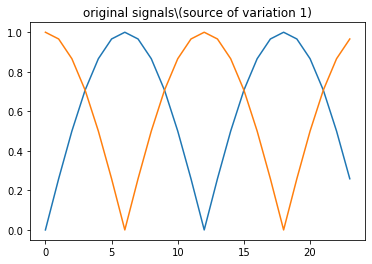

In [2]:
typical_daily_abundance_1 = np.abs(np.sin(2*np.pi*np.arange(24)/24))
typical_daily_abundance_2 = np.abs(np.cos(2*np.pi*np.arange(24)/24))
noise = (np.random.random(24)-0.5)*2
plt.plot(typical_daily_abundance_1)
plt.plot(typical_daily_abundance_2)
plt.title('original signals\(source of variation 1)')
plt.show()


Text(0.5, 1.0, "example of 'typical' abundance over \nthe week for either profile (from 0 to 1)\n(source of variation 2)")

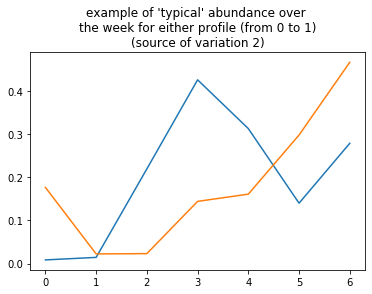

In [3]:
typical_weekly_abundance_1 = np.abs(np.cumsum(np.random.random(7)-0.5)*0.5)
typical_weekly_abundance_2 = np.abs(np.cumsum(np.random.random(7)-0.5)*0.5)
plt.plot(typical_weekly_abundance_1)
plt.plot(typical_weekly_abundance_2)
plt.title('example of \'typical\' abundance over \nthe week for either profile (from 0 to 1)\n(source of variation 2)')


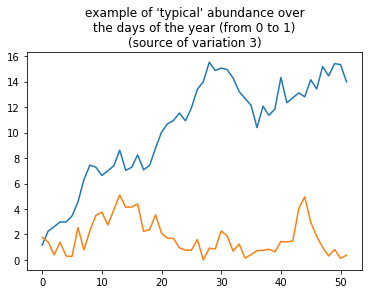

In [4]:
typical_yearly_abundance_1 = np.abs(np.cumsum(np.random.normal(0,1,52)))
typical_yearly_abundance_2 = np.abs(np.cumsum(np.random.normal(0,1,52)))

plt.plot(typical_yearly_abundance_1)
plt.plot(typical_yearly_abundance_2)
plt.title('example of \'typical\' abundance over\nthe days of the year (from 0 to 1)\n(source of variation 3)')
plt.show()

In [5]:
# f,ax = plt.subplots(1,2,figsize=(15,6))
# example_week = []
# example_week_with_noise = []
# for ab1,ab2 in zip(noise1,noise2):
#     noise = np.random.random(24)
#     abundance = list(ab1*np.array(dist_1) + ab2*np.array(dist_2)) 
#     example_week += abundance
#     example_week_with_noise += list(np.array(abundance) + noise)
    
# ax[0].plot(example_week)
# ax[1].plot(example_week_with_noise)
# ax[0].set_title('example week (pure)')
# ax[1].set_title('example week (with daily noise)')

In [6]:
# def compute_day(typical_daily_abundance_1,
#                 typical_daily_abundance_2,
#                 day_noise_coeff = 1,
#                 typical_weekly_abundance_1,
#                 typical_weekly_abundance_2):
    
#     noise = np.random.random(24)*noise_coeff
#     abundance = list(ab1*np.array(dist_1) + ab2*np.array(dist_2) + noise) 
#     return abundance

In [7]:
# def compute_week(typical_daily_abundance_1,
#                  typical_daily_abundance_2,
#                  day_noise_coeff = 1,
#                  typical_weekly_abundance_1,
#                  typical_weekly_abundance_2,
#                  week_noise_coeff = 1,
#                  typical_yearly_abundance_1,
#                  typical_yearly_abundance_2):
#     week_ab_1 = np.random.random(7)
#     week_ab_2 = np.random.random(7)
#     week = []
#     for  in range():
#         week = week + compute_day(dist_1,dist_2,day_ab1,day_ab2,noise_coeff)
#     return week

In [8]:
# typical_daily_abundance_1 =  np.abs(np.sin(np.pi*np.arange(24)/24))
# typical_daily_abundance_2 =  np.abs(np.cos(np.pi*np.arange(24)/24))
# typical_daily_abundance_3 =  np.ones(24)

# typical_weekly_abundance_1 = np.abs( np.random.random(7) + 2)
# typical_weekly_abundance_2 = np.abs( np.random.random(7) + 2)
# typical_weekly_abundance_3 = np.ones(7)


# typical_yearly_abundance_1 = np.abs( np.random.random(52) + 2)
# typical_yearly_abundance_2 = np.abs( np.random.random(52) + 2)
# typical_yearly_abundance_3 = np.abs( np.sin(2*np.pi/52*np.arange(52)))



In [9]:
# plt.plot(typical_yearly_abundance_3)

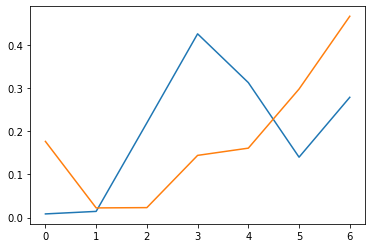

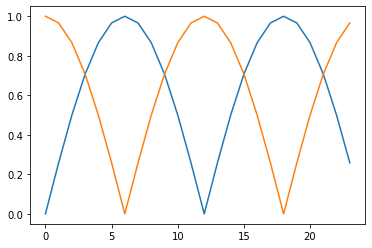

In [10]:
plt.plot(typical_weekly_abundance_1)
plt.plot(typical_weekly_abundance_2)
plt.show()
plt.plot(typical_daily_abundance_1)
plt.plot(typical_daily_abundance_2)
plt.show()

In [11]:
# data = []
# # a year
# for year in range(10):
#     year = []
#     # for each week in a year (typical behaviour of either profile over the year)
#     for w_ab1,w_ab2,w_ab3 in zip(typical_yearly_abundance_1,
#                                  typical_yearly_abundance_2,
#                                  typical_yearly_abundance_3):
#         # random noise for either profile
#         w_ab1 += np.random.random(1)/0.5
#         w_ab2 += np.random.random(1)/0.5
#         week = []
#         # for each day in a week (typical behaviour of a day in a week)
#         for d_ab1,d_ab2,d_ab3 in zip(typical_weekly_abundance_1,
#                                      typical_weekly_abundance_2,
#                                      typical_weekly_abundance_3):
#             # for each hour in a day (typical behaviour of an hour in each day)
            
#             random_noise_for_the_day = np.random.normal(0,5,24)
#             tmp_day = typical_daily_abundance_1*d_ab1*w_ab1 \
#                       + typical_daily_abundance_2*d_ab2*w_ab2 \
#                       + typical_daily_abundance_3*d_ab3*w_ab3 \
#                       + random_noise_for_the_day
# #             print(tmp_day)
#             week += list(tmp_day)
#         year += week
#     data += year

In [12]:
typical_daily_abundance_1 =  np.abs(np.sin(np.pi*np.arange(24)/24))
typical_daily_abundance_2 =  np.abs(np.cos(np.pi*np.arange(24)/24))
typical_daily_abundance_3 =  np.ones(24)

typical_weekly_abundance_1 = np.abs( np.sin(np.pi*np.arange(7)/7)+2)
typical_weekly_abundance_2 = np.abs( np.cos(np.pi*np.arange(7)/7)+2)
typical_weekly_abundance_3 = np.ones(7)


typical_yearly_abundance_1 = np.abs( np.sin(np.pi*np.arange(52)/52))
typical_yearly_abundance_2 = np.abs( np.cos(np.pi*np.arange(52)/52))
typical_yearly_abundance_3 = np.abs( np.sin(np.pi*2*np.arange(52)/52))



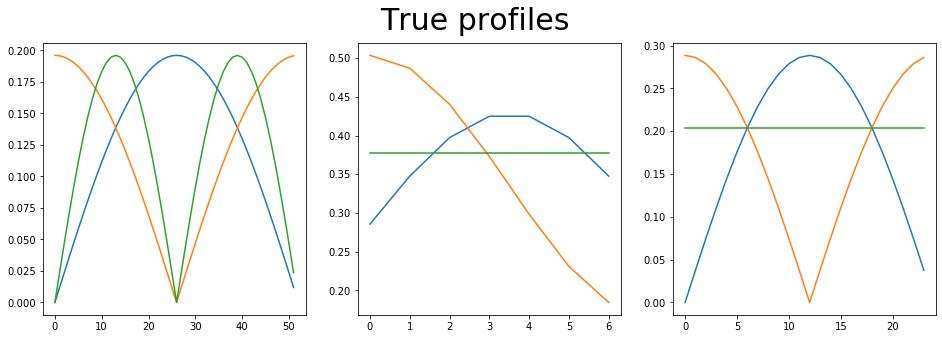

In [13]:
f,ax = plt.subplots(1,3,figsize=(16,5))
ax[2].plot(typical_daily_abundance_1 /np.linalg.norm(typical_daily_abundance_1 ))
ax[2].plot(typical_daily_abundance_2 /np.linalg.norm(typical_daily_abundance_2 ))
ax[2].plot(typical_daily_abundance_3 /np.linalg.norm(typical_daily_abundance_3 ))
ax[1].plot(typical_weekly_abundance_1/np.linalg.norm(typical_weekly_abundance_1))
ax[1].plot(typical_weekly_abundance_2/np.linalg.norm(typical_weekly_abundance_2))
ax[1].plot(typical_weekly_abundance_3/np.linalg.norm(typical_weekly_abundance_3))
ax[0].plot(typical_yearly_abundance_1/np.linalg.norm(typical_yearly_abundance_1))
ax[0].plot(typical_yearly_abundance_2/np.linalg.norm(typical_yearly_abundance_2))
ax[0].plot(typical_yearly_abundance_3/np.linalg.norm(typical_yearly_abundance_3))
plt.suptitle('True profiles',fontsize=30)
plt.show()

In [14]:
daily_profiles = np.array([typical_daily_abundance_1,
                           typical_daily_abundance_2,
                           typical_daily_abundance_3]).T

weekly_profiles = np.array([typical_weekly_abundance_1,
                            typical_weekly_abundance_2,
                            typical_weekly_abundance_3]).T

yearly_profiles = np.array([typical_yearly_abundance_1,
                            typical_yearly_abundance_2,
                            typical_yearly_abundance_3]).T

In [15]:
daily_noise = np.array([np.abs(np.random.random(24)),
                        np.abs(np.random.random(24)),
                        np.abs(np.random.random(24))]).T/2+0.5

weekly_noise = np.array([np.abs(np.random.random(7)),
                         np.abs(np.random.random(7)),
                         np.abs(np.random.random(7))]).T/2+0.5

yearly_noise = np.array([np.abs(np.random.random(52)),
                         np.abs(np.random.random(52)),
                         np.abs(np.random.random(52))]).T/2+0.5

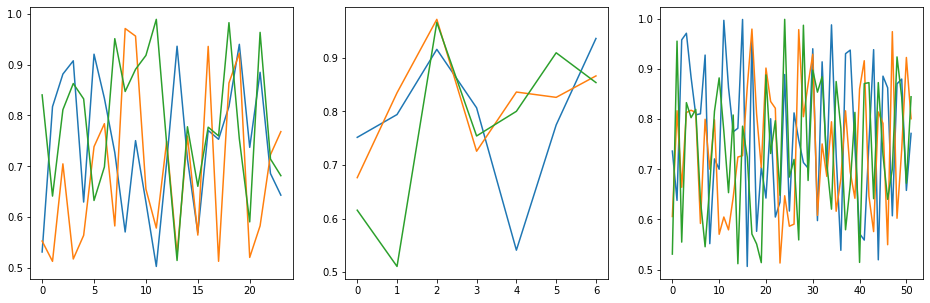

In [16]:
f,ax = plt.subplots(1,3,figsize=(16,5))
ax[0].plot(daily_noise)
ax[1].plot(weekly_noise)
ax[2].plot(yearly_noise)

In [19]:
clean_construction = khatri_rao([yearly_profiles,weekly_profiles,daily_profiles])
pure_noise =  khatri_rao([yearly_noise,weekly_noise,daily_noise])

In [20]:
data = clean_construction.sum(axis=1)

In [21]:
noisy_data_1 = data+pure_noise.sum(axis=1)
noisy_data_2 = (clean_construction*pure_noise).sum(axis=1)

In [22]:
# tensor = np.array(data).reshape(-1,7,24)

In [23]:
# (core_tesnor,loadings),errors = non_negative_parafac(tensor,
#                                                     rank=3,
#                                                     n_iter_max = 1000,
#                                                     tol=1e-10,  
#                                                     return_errors=True, 
# #                                                             flat_factors = flat_factors,
#                                                     normalize_factors=False)
# l_weeks,l_days,l_hours = loadings

In [24]:
flat_factors = [(1,0),(2,0)]

In [25]:
(core_tesnor,loadings),errors = non_negative_parafac_custom(tensor,
                                                            rank=3,
                                                            n_iter_max = 20000,
                                                            tol=1e-10,  
                                                            return_errors=True, 
                                                            flat_factors = flat_factors,
                                                    normalize_factors=False)
l_weeks,l_days,l_hours = loadings

NameError: name 'tensor' is not defined

In [28]:
# plt.plot(errors)

NameError: name 'l_weeks' is not defined

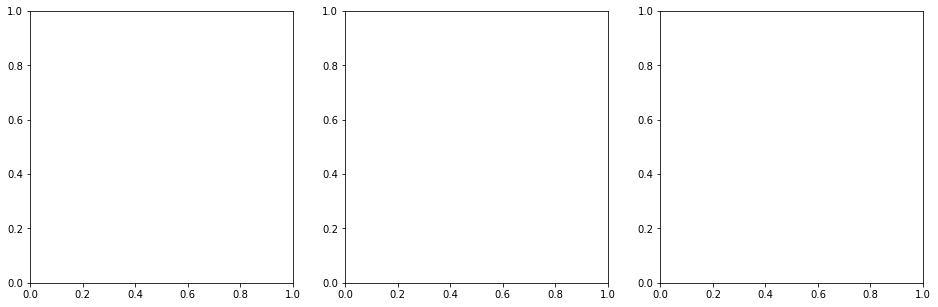

In [29]:
f,ax = plt.subplots(1,3,figsize=(16,5))
ax[0].plot(l_weeks/np.linalg.norm(l_weeks,axis=0))
ax[1].plot(l_days/np.linalg.norm(l_days,axis=0))
ax[2].plot(l_hours/np.linalg.norm(l_hours,axis=0))
plt.show()

# With addative noise:

In [31]:
(core_tesnor,loadings),errors = non_negative_parafac_custom(noisy_data_1.reshape(-1,7,24),
                                                            rank=3,
                                                            n_iter_max = 20000,
                                                            tol=1e-10,  
                                                            return_errors=True, 
                                                            flat_factors = flat_factors,
                                                    normalize_factors=False)
l_weeks,l_days,l_hours = loadings

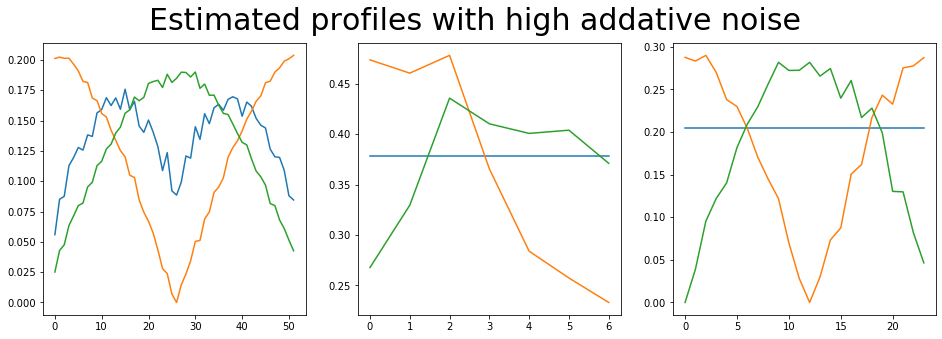

In [32]:
f,ax = plt.subplots(1,3,figsize=(16,5))
ax[0].plot(l_weeks/np.linalg.norm(l_weeks,axis=0))
ax[1].plot(l_days/np.linalg.norm(l_days,axis=0))
ax[2].plot(l_hours/np.linalg.norm(l_hours,axis=0))
plt.suptitle('Estimated profiles with high addative noise',fontsize=30)
plt.show()

# With multiplicative noise

In [33]:
(core_tesnor,loadings),errors = non_negative_parafac_custom(noisy_data_2.reshape(-1,7,24),
                                                            rank=3,
                                                            n_iter_max = 20000,
                                                            tol=1e-10,  
                                                            return_errors=True, 
                                                            flat_factors = flat_factors,
                                                    normalize_factors=False)
l_weeks,l_days,l_hours = loadings

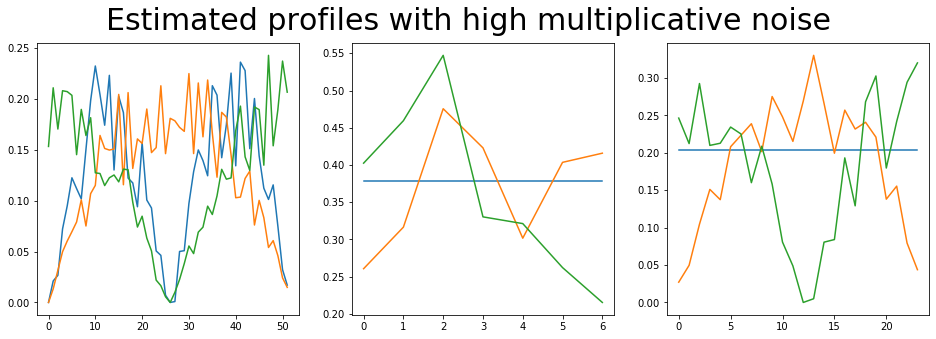

In [34]:
f,ax = plt.subplots(1,3,figsize=(16,5))
ax[0].plot(l_weeks/np.linalg.norm(l_weeks,axis=0))
ax[1].plot(l_days/np.linalg.norm(l_days,axis=0))
ax[2].plot(l_hours/np.linalg.norm(l_hours,axis=0))
plt.suptitle('Estimated profiles with high multiplicative noise',fontsize=30)
plt.show()

# MSE for overall data

In [18]:
from tensorly.kruskal_tensor import khatri_rao

In [ ]:
reconstructed = khatri_rao(loadings)

In [ ]:
residuals = khatri_rao(loadings).sum(axis=1)-tensor.ravel()

In [ ]:
np.mean(residuals**2)

# MSE for each profile

In [ ]:
plt.hist(reconstructed[:,[0,1,2]])

In [ ]:
plt.hist(clean_construction[:,[2,0,1]])

In [ ]:
plt.plot(clean_construction,alpha=0.5)